In [1]:
using LinearAlgebra

Recall that least square solution to $Ax = b$ is $(A^* A)x = A^* b$. Although it works quite consistently in many cases, $cond(A^* A)$ is approximately $cond(A)^2$. So $A^* A$ can be ill-conditioned which means that its columns may not be as independent as we desire and may cause significant errors.

# Orthogonality

Two vectors $q_1$ and $q_2$ are orthonormal if $q_1^* q_2 = 0$ and $||q1||_2 = ||q2||_2 = 1$. Square matrices that have orthonormal columns are called univariate (orthogonal if entities are real) matrices: $Q = \begin{bmatrix}
    \vert & \vert & & \vert \\
    q_1   & q_2 & ... & q_n   \\
    \vert & \vert & & \vert
\end{bmatrix}$

Note that $Q^* Q = Q Q^* = I$ which also implies that $Q^{-1} = Q^*$

- Angles between the vectors and their lengths are preserved under the operation of multiplication with unitary matrices or their adjoints (transposes if entries are real).

__Proof:__ The inner product is the same => $(Qx)^* (Qy) = x^* y$. $||Qx||_2 = ||x||_2 => \sqrt(x^* Q^* Qx) = \sqrt(x^* x) = ||x||_2$.

# Projector

- A projector $P$ is a square matrix that satisfies $P^2 = P$.

- A projector is orthogonal if it is hermitian (symmetric if entities are real): $P = P^*$.

- If $P$ is a projector, $I-P$ is also a projector. If $P$ is an orthogonal projector then $I-P$ is also an orthogonal projector.

__Rank one orthogonal projector:__ Given a unit vector $q$, $q q^*$ is an orthogonal projector.

__Proof:__ It is a projector since $q q^* q q^* = q I q^* = q q^*$. It is orthogonal since $(q q^*)^* = q q^*$.

__Note:__ $I-q q^*$ is rank $n-1$ orthogonal projector.

__Note:__ For any vector $a$ except $a=0$, $\frac{a a^*}{a^* a}$ is also an orthogonal projector since it is equal to $\frac{a}{||a||_2} \frac{a^*}{||a||_2}$.

__Projection with an arbitrary basis:__ Above rule for vectors can be generalized to matrices: $P = A (A^* A)^{-1} A^*$ is an orthogonal projector for any $A$ in $\mathbb{R}^{m \times n}$ but matrix of zeros.

In [8]:
A = randn(4,3)
P = A*inv(transpose(A)*A)*transpose(A)

4×4 Array{Float64,2}:
  0.848858   -0.0964794   0.285151   0.19411 
 -0.0964794   0.938414    0.182022   0.123908
  0.285151    0.182022    0.462022  -0.366217
  0.19411     0.123908   -0.366217   0.750706

In [9]:
P*P

4×4 Array{Float64,2}:
  0.848858   -0.0964794   0.285151   0.19411 
 -0.0964794   0.938414    0.182022   0.123908
  0.285151    0.182022    0.462022  -0.366217
  0.19411     0.123908   -0.366217   0.750706

Consider an $m \times n$ dimensional matrix $S$ where $m>n$ with orthonormal columns. Then $S^* S = I_{n \times n}$ and $S S^*$ is an orthogonal projector. Below a simple example with standard bases is given below: 

In [10]:
S = [1 0; 0 1; 0 0]

3×2 Array{Int64,2}:
 1  0
 0  1
 0  0

In [11]:
transpose(S)*S

2×2 Array{Int64,2}:
 1  0
 0  1

In [12]:
P = S*transpose(S)

3×3 Array{Int64,2}:
 1  0  0
 0  1  0
 0  0  0

In [13]:
P*P

3×3 Array{Int64,2}:
 1  0  0
 0  1  0
 0  0  0

# QR Factorization

Returning back to the situation given in the introduction. One way to avoid solving $(A^* A)x = A^* b$ is to decompose $A$ as $Q R$ where $Q$ is an orthogonal matrix and $R$ is a triangular matrix which reduces the solution of $A x = b$ to $QRx = b => Rx = Q^* b$ which can be easily solved by back-substitution.

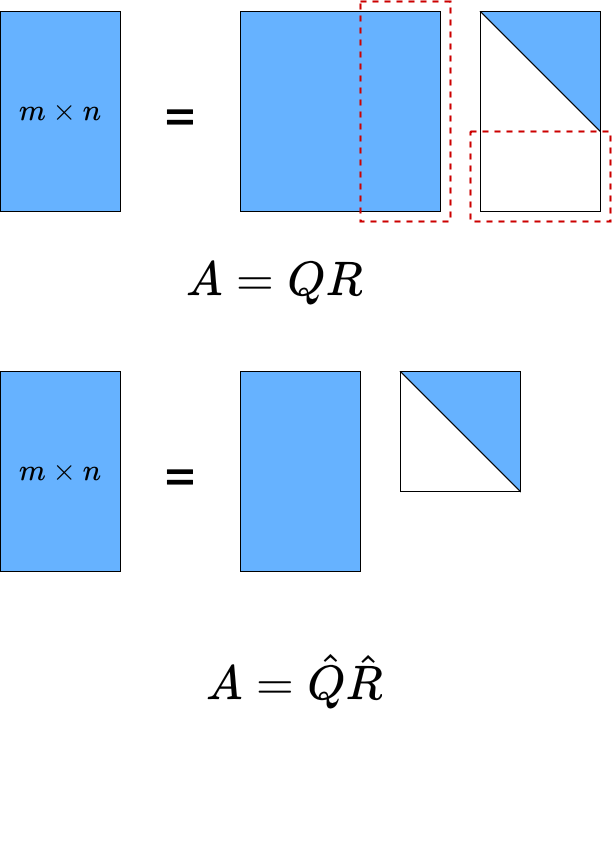

In [4]:
#full and reduced QR factorizations, respectively
display("image/png", read("qr.png"))

- All matrices have QR factorizations and under suitable restrictions they are unique.

In [19]:
A = 10*randn(4,3)
F = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
4×4 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.174202  -0.710452  -0.589012   0.343477
  0.861782  -0.435467   0.144003  -0.21671 
  0.128217   0.300121  -0.741658  -0.58603 
  0.458852   0.464277  -0.286831   0.701163
R factor:
3×3 Array{Float64,2}:
 14.9936    2.33093  -14.634  
  0.0     -10.1286    -8.19352
  0.0       0.0       12.3401 

In [21]:
A

4×3 Array{Float64,2}:
 -2.61192   6.78984    1.10192
 12.9212    6.41943   -7.26634
  1.92244  -2.74095  -13.4875 
  6.87986  -3.63293  -14.0584 

In [22]:
F.Q * F.R

4×3 Array{Float64,2}:
 -2.61192   6.78984    1.10192
 12.9212    6.41943   -7.26634
  1.92244  -2.74095  -13.4875 
  6.87986  -3.63293  -14.0584 

Note that in Julia Q and R components are stored in a special type. Also note that it is a full QR factorization where the zero components of R is not stored for efficiency.

## Gram-Schmidt orthogonalization

$q_1 = a_1/||a_1||_2$ so $r_{11} = ||a_1||_2$

$v_2 = a_2 - q_1^* q_1 a_2$, subtract the component of $a_2$ on the $q_1$ to satisfy orthogonality. So $r_{12} = q_1^* a_2$

$q_2 = v_2/||v_2||_2$ where $r_{22} = ||v_2||_2$

... Continue like that

- Although it is a simple procedure, prone to numerical unstabilities due to rounding errors.

- Modified Gram-Schmidt and Householder triangularization provides stable algorithms for the same purpose.

__Pseudoinverse:__ The least squares solution to $Ax = b$ is $x = (A^* A)^{-1} A^* b$ and $(A^* A)^{-1} A^*$ is called pseudoinverse of $A$ and denoted by $A^+$

__Note:__ The exact solution for $Ax=b$ is automatically realized in Julia by x=A\b. For triangular matrices, no factorization is required. Otherwise, Julia use LU decomposition for non-square matrices, and QR factorization for square ones.

In [16]:
A = [1 0; 1 -2]; b = [32; -4];
x = A\b

2-element Array{Float64,1}:
 32.0
 18.0